Idea: each stress testing should ouptut a score that, in the end, will be used to calculate the final score. If the strategy passes (>80% for example), then it will output a boolean which means that it will be used in the portfolio management module

In [44]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

df = yf.download('TSLA')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2025-01-02 00:00:00+00:00,379.279999,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03 00:00:00+00:00,410.440002,410.440002,411.880005,379.450012,381.480011,95423300


In [45]:
import pandas as pd
returns = np.log(1 + df['Adj Close'].pct_change())
returns = returns.dropna()

In [46]:
mu, sigma = returns.mean(), returns.std()

In [47]:
sim_rets = np.random.normal(mu, sigma, 252)

In [48]:
initial_price = df['Adj Close'].iloc[-1].iloc[0]
initial_price

394.94000244140625

In [49]:
sim_prices = initial_price * np.exp(sim_rets.cumsum())
sim_prices_2 = initial_price * (sim_rets + 1).cumprod()

In [50]:
sim_prices

array([388.26273979, 402.69150968, 407.98177739, 417.02327041,
       419.69168905, 433.21728193, 458.40384506, 444.36988552,
       470.68001248, 456.26251159, 459.3830317 , 445.4613102 ,
       461.89782294, 475.02984517, 467.15853502, 484.74557801,
       470.01153291, 497.58704369, 499.73918756, 500.93658574,
       502.79733244, 509.55793945, 485.4470977 , 471.14656674,
       478.00035781, 483.75628556, 475.82879019, 493.06111526,
       492.40767473, 486.72328384, 466.4126847 , 471.07008619,
       457.58888677, 457.75315842, 471.68574337, 468.96446736,
       465.14321884, 447.06661652, 441.60485186, 433.52472927,
       475.20345641, 498.62153544, 505.551552  , 512.92079736,
       485.55540149, 477.55849482, 466.94632671, 470.8095007 ,
       483.16475527, 471.95845743, 473.44196384, 475.94461997,
       455.75519407, 460.71837188, 433.46995398, 415.35526547,
       408.02217961, 408.63848177, 393.82920657, 388.98467444,
       398.12799507, 396.09668349, 373.92431131, 375.80

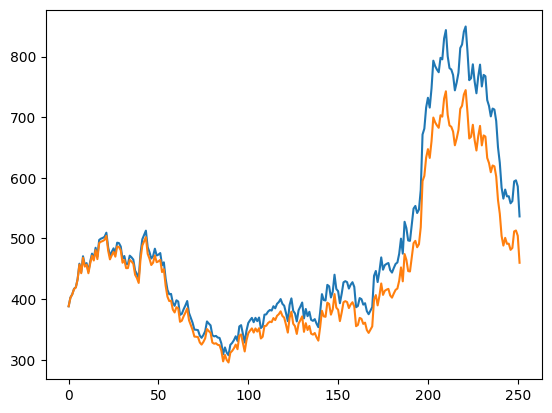

In [51]:
plt.plot(sim_prices)
plt.plot(sim_prices_2)

C:\Users\yassi\AppData\Local\Temp\ipykernel_18176\2846470099.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normal_prices_df[i] = sim_prices
C:\Users\yassi\AppData\Local\Temp\ipykernel_18176\2846470099.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normal_prices_df[i] = sim_prices
C:\Users\yassi\AppData\Local\Temp\ipykernel_18176\2846470099.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

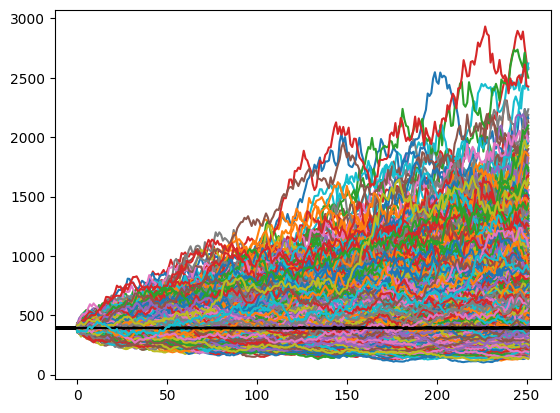

In [52]:
normal_prices_df = pd.DataFrame()
num_simulations = 1000
for i in range(num_simulations):
    sim_rets = np.random.normal(mu, sigma, 252)
    sim_prices = initial_price * np.exp(sim_rets.cumsum())
    normal_prices_df[i] = sim_prices
    plt.axhline(initial_price, c = 'k')
    plt.plot(sim_prices)

In [53]:
normal_prices_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,436.481133,379.320664,375.067709,393.069822,384.332598,386.860561,414.043920,397.238475,384.759333,395.625569,...,386.416552,389.425745,390.122255,395.232944,411.252144,415.486591,400.114674,406.623881,414.306253,370.932676
1,421.739723,385.477116,378.005579,409.014214,392.640333,360.294775,396.994312,409.126308,394.583239,392.847822,...,384.419671,372.417928,393.167328,401.751407,408.612704,400.369892,385.853958,411.398140,420.395411,360.245487
2,415.947769,401.064253,352.446299,414.433314,387.829408,358.281348,397.640181,434.420677,379.009387,385.994443,...,410.012575,375.876621,386.212688,405.903846,434.605685,397.532676,395.658564,410.505468,442.028285,370.410243
3,415.168425,406.646422,329.705089,412.546551,407.584659,360.096797,404.654518,428.457829,362.084995,390.577772,...,435.065106,379.212971,389.958455,408.682738,429.226759,393.622501,393.135849,394.309842,419.928908,364.389111
4,414.516513,412.404531,316.543136,394.735818,403.388421,353.360412,388.735984,442.850381,381.096030,367.248449,...,435.721984,384.855400,399.659053,425.614447,403.920121,385.797852,387.777478,386.413245,423.146375,365.205312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,925.822751,216.054860,290.611800,500.086386,632.062571,179.405450,545.212402,376.118768,542.640653,956.430923,...,864.105966,1044.695580,1502.977755,581.350719,315.891465,886.818714,632.664243,689.606594,1557.324543,877.317049
248,896.625848,219.562124,270.000301,487.357611,663.501381,176.742832,566.789831,380.547781,530.985572,1001.252045,...,847.638526,990.565101,1570.969523,601.549732,332.072515,857.490634,602.335369,666.982095,1596.548667,861.530414
249,895.359398,217.018713,264.805239,485.441263,675.483098,181.555297,562.519914,380.419744,527.598986,1010.987586,...,849.895475,977.004604,1726.021240,633.774430,326.444851,862.301665,604.580047,643.613737,1633.425810,899.633159
250,910.328913,206.731790,276.409717,499.929597,713.959966,178.051832,583.623260,366.769289,524.101041,1019.377753,...,855.468430,995.462628,1768.447552,669.677530,334.209217,885.414506,595.100485,611.247279,1583.360772,924.366644


In [54]:
def normal_sims(returns, num_simulations):
    mu, sigma = returns.mean(), returns.std()
    normal_prices_df = pd.DataFrame()
    for i in range(num_simulations):
        sim_rets = np.random.normal(mu, sigma, 252)
        sim_prices = np.exp(sim_rets.cumsum())
        normal_prices_df[i] = sim_prices
        plt.axhline(initial_price, c = 'k')
        plt.plot(sim_prices)
    return normal_prices_df

---

Using the student-t distribution as it accounts for fat-tails

In [55]:
returns = returns.dropna()

(array([ 0.018042  ,  0.018042  ,  0.018042  ,  0.018042  ,  0.05412601,
         0.09021002,  0.09021002,  0.12629403,  0.14433603,  0.41496609,
         0.84797418,  1.17273025,  2.94084663,  5.66518922, 10.42827824,
        16.45430753, 12.50310869,  7.23484355,  3.84294683,  1.58769634,
         0.95622621,  0.4510501 ,  0.28867206,  0.16237803,  0.16237803,
         0.12629403,  0.05412601,  0.05412601,  0.018042  ,  0.018042  ]),
 array([-0.23651789, -0.22135755, -0.20619721, -0.19103686, -0.17587652,
        -0.16071618, -0.14555583, -0.13039549, -0.11523515, -0.1000748 ,
        -0.08491446, -0.06975412, -0.05459377, -0.03943343, -0.02427309,
        -0.00911274,  0.0060476 ,  0.02120794,  0.03636829,  0.05152863,
         0.06668898,  0.08184932,  0.09700966,  0.11217001,  0.12733035,
         0.14249069,  0.15765104,  0.17281138,  0.18797172,  0.20313207,
         0.21829241]),
 <BarContainer object of 30 artists>)

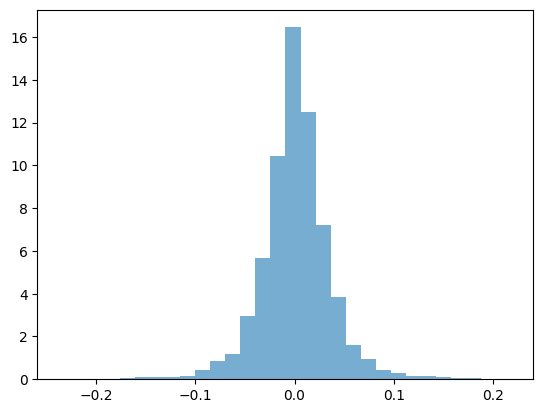

In [56]:
# 2. Distribution Fitting
# Empirical distribution
plt.hist(returns, bins=30, density=True, alpha=0.6, label='Empirical')

In [57]:
# T-distribution fit
df, loc, scale = stats.t.fit(returns)
df, loc, scale

(3.209824936249038, 0.00139997532381771, 0.02359091548235987)

In [58]:
x = np.linspace(returns.min(), returns.max(), 100)
x

array([[-0.23651789],
       [-0.23192385],
       [-0.22732981],
       [-0.22273576],
       [-0.21814172],
       [-0.21354768],
       [-0.20895363],
       [-0.20435959],
       [-0.19976555],
       [-0.1951715 ],
       [-0.19057746],
       [-0.18598342],
       [-0.18138937],
       [-0.17679533],
       [-0.17220129],
       [-0.16760724],
       [-0.1630132 ],
       [-0.15841916],
       [-0.15382511],
       [-0.14923107],
       [-0.14463702],
       [-0.14004298],
       [-0.13544894],
       [-0.13085489],
       [-0.12626085],
       [-0.12166681],
       [-0.11707276],
       [-0.11247872],
       [-0.10788468],
       [-0.10329063],
       [-0.09869659],
       [-0.09410255],
       [-0.0895085 ],
       [-0.08491446],
       [-0.08032042],
       [-0.07572637],
       [-0.07113233],
       [-0.06653829],
       [-0.06194424],
       [-0.0573502 ],
       [-0.05275616],
       [-0.04816211],
       [-0.04356807],
       [-0.03897402],
       [-0.03437998],
       [-0

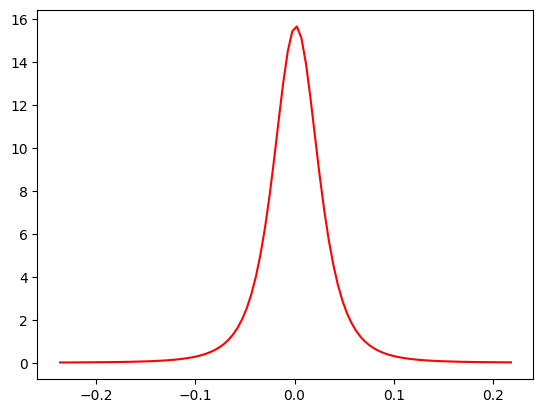

In [59]:
plt.plot(x, stats.t.pdf(x, df, loc, scale), 'r-', label='T-Distribution Fit')

In [60]:
# Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(returns.dropna(), lambda x: stats.t.cdf(x, df, loc, scale))
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")

KS Statistic: [0.01344701], P-value: [0.51864429]


In [61]:
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size = len(returns))

In [62]:
simulated_returns

array([ 0.00452783, -0.04809238,  0.02189801, ..., -0.00455004,
       -0.00264933,  0.01467215])

In [63]:
simulated_cumulative_returns = np.exp(simulated_returns.cumsum())

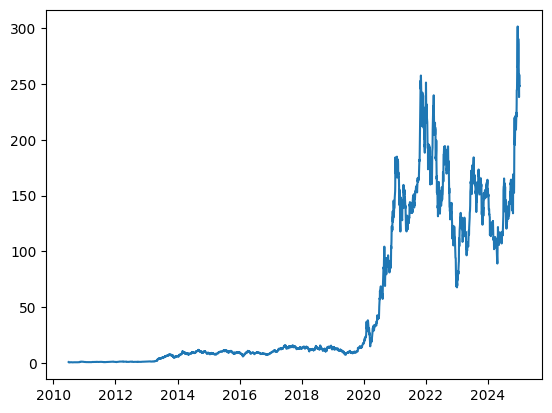

In [64]:
plt.plot(np.exp(returns.cumsum()))

Monte-Carlo using the t-distribution

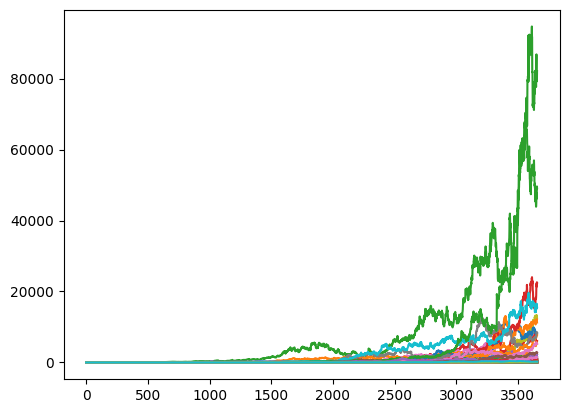

In [65]:
# Monte Carlo Simulation (Parametric Bootstrap)
df, loc, scale = stats.t.fit(returns)
num_simulations = 100
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
simulated_prices_df = pd.DataFrame(simulated_cumulative_returns)
for i in range(num_simulations):
    plt.plot(simulated_cumulative_returns[i, :])

In [66]:
def t_sims(returns, num_simulations):
    df, loc, scale = stats.t.fit(returns)
    simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
    simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
    simulated_prices_df = pd.DataFrame(simulated_cumulative_returns).transpose()
    for i in range(num_simulations):
        plt.plot(simulated_cumulative_returns[i, :])

In [67]:
# 2. Define the Performance Metric Functions

def max_drawdown_fnct(prices):
    """Calculate the maximum drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.min()

def average_drawdown(prices):
    """Calculate the average drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.mean()

def average_drawdown_duration(prices):
    """Calculate the average duration of drawdowns."""
    drawdowns = (prices / prices.cummax() - 1)
    drawdown_durations = []
    drawdown_start = None
    for i in range(1, len(drawdowns)):
        if drawdowns[i] < 0:
            if drawdown_start is None:
                drawdown_start = i
        else:
            if drawdown_start is not None:
                drawdown_durations.append(i - drawdown_start)
                drawdown_start = None
    return np.mean(drawdown_durations) if drawdown_durations else 0

def sharpe_ratio_fnct(prices, risk_free_rate=0):
    """Calculate the Sharpe ratio."""
    returns = prices.pct_change().dropna()
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0

In [68]:
# 3. Calculate Metrics for Each Simulation
metrics = {
    'max_drawdown': [],
    'avg_drawdown': [],
    'avg_drawdown_duration': [],
    'sharpe_ratio': [],
}

# Calculate metrics for each simulation path
for i in range(num_simulations):
    sim_prices = simulated_prices_df.iloc[:, i]  # Get the i-th column (price path)
    metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
    metrics['avg_drawdown'].append(average_drawdown(sim_prices))
    metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
    metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

# 4. Convert metrics to a DataFrame for easy handling
metrics_df = pd.DataFrame(metrics)


In [69]:
def metrics_df_fnct(df, num_simulations):
    metrics = {
        'max_drawdown': [],
        'avg_drawdown': [],
        'avg_drawdown_duration': [],
        'sharpe_ratio': [],
    }

    # Calculate metrics for each simulation path
    for i in range(num_simulations):
        sim_prices = df.iloc[:, i]  # Get the i-th column (price path)
        metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
        metrics['avg_drawdown'].append(average_drawdown(sim_prices))
        metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
        metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

    # Convert metrics to a DataFrame for easy handling
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [70]:
metrics_df.describe()

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio
count,100.000000,100.000000,100.000000,100.000000
mean,-0.656137,-0.329894,15.751738,0.170705
std,0.160714,0.079182,5.275569,0.064977
min,-0.858076,-0.431465,5.125000,0.033134
25%,-0.775393,-0.385971,11.500000,0.111647
50%,-0.711689,-0.353347,15.166667,0.204629
75%,-0.563527,-0.291529,18.400000,0.230483
max,-0.187521,-0.078770,36.000000,0.241342


In [71]:
# Example Scoring (Adapt weights and targets to your needs)
def score_strategy(mdd, avg_dd, sharpe, recovery):
    weights = [0.25, 0.25, 0.25, 0.25]
    mdd_score = 100 - (abs(mdd) / 0.50) * 100
    avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
    avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
    sharpe_score = (sharpe) / 0.5 * 100
    total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score])
    return total_score

mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)
print(f"Average Max Drawdown: {mdd}")
print(f"Average Drawdown: {avg_dd}")
print(f"Average Recovery Time: {recovery}")
print(f"Sharpe Ratio: {sharpe}")
print(f"Overall Score: {overall_score}")

Average Max Drawdown: -0.656136883019364
Average Drawdown: -0.3298936613116022
Average Recovery Time: 15.751738095238098
Sharpe Ratio: 0.17070523263502513
Overall Score: 9.863182302003787


In [72]:
confidence_level = 0.95
lower_bound_mdd = np.percentile(mdd, (1-confidence_level)/2 * 100)
upper_bound_mdd = np.percentile(mdd, (1+confidence_level)/2 * 100)
print(f"{confidence_level*100:.0f}% confidence interval for Max Drawdown: [{lower_bound_mdd:.4f}, {upper_bound_mdd:.4f}]")

95% confidence interval for Max Drawdown: [-0.6561, -0.6561]


---

Using Block Bootstrapping, a shuffling method that keeps the autocorrelation of the data

In [73]:
# Parameters
block_size = 5
num_iterations = 100
resampled_series = []

for _ in range(num_iterations):
    # Create overlapping blocks
    blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
    # Randomly sample blocks
    sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        #Shuffles the blocks, with replacement 
    # Concatenate and truncate
    resampled = np.concatenate(sampled_blocks)[:len(returns)]
    resampled_series.append(resampled)

# Analyze resampled series (e.g., calculate mean, variance, etc.)
bootstrap_means = [np.mean(series) for series in resampled_series]
print("Bootstrap Mean Estimate:", np.mean(bootstrap_means))

Bootstrap Mean Estimate: 0.0015234501960268152


In [74]:
def block_bootstrap(returns, block_size, num_iterations):
    resampled_series = []
    for _ in range(num_iterations):
        blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
        sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        resampled = np.concatenate(sampled_blocks)[:len(returns)]
        resampled_cum = np.exp(resampled.cumsum())
        resampled_series.append(resampled_cum)
    return pd.DataFrame(resampled_series).transpose()


# Parameters
block_size = 20  # A common value for daily data is around 20 (roughly a month)
num_iterations = 100

bootstrapped_returns = block_bootstrap(returns, block_size, num_iterations)

In [97]:
bootstrapped_returns

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.984674,0.998123,0.985890,0.909271,0.992707,0.974311,1.033890,0.971943,1.018103,1.037815,...,0.970594,0.986062,0.968381,0.989601,0.978663,1.020107,0.982203,0.984334,0.987446,1.015270
1,0.973286,0.996598,0.976564,0.924207,0.961319,0.984680,1.064405,0.976142,0.879502,1.047241,...,0.976798,0.944607,0.992335,1.071490,0.969559,0.948476,0.989992,0.954865,0.996444,1.015392
2,0.931367,1.018504,0.890798,0.847918,0.985098,0.996074,1.061593,0.937871,0.876504,1.073590,...,0.989400,0.949957,1.009582,1.022530,1.064011,0.944392,0.987666,0.965512,0.985261,1.017260
3,0.970378,1.034720,0.896360,0.840987,1.002219,1.016899,1.078748,0.898470,0.906215,1.084891,...,0.959261,0.948473,1.002236,1.004332,1.079374,1.035501,1.013470,0.969048,0.984190,1.021687
4,0.995336,1.054661,0.898037,0.889031,0.994927,1.002859,1.072315,0.853942,0.931160,1.109586,...,0.945487,0.946990,0.984350,0.947573,1.076814,1.013195,1.062263,0.922773,0.987917,1.020225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,71.474801,1688.921743,1482.356051,1243.603827,9758.036777,221.212346,40.984517,1007.202384,104.711220,175.938272,...,833.816122,8490.544440,22.450393,70658.276897,398.668618,160.694266,326.889975,442.597110,899.944478,1309.375499
3652,68.180904,1714.647228,1481.748848,1213.457052,9693.836427,226.570085,40.350345,1011.024166,104.651324,169.513633,...,861.458289,8409.395828,21.673169,68508.901685,399.187224,155.216176,339.823043,440.828560,859.666962,1246.938228
3653,67.894206,1717.278803,1326.901030,1201.808559,10056.021387,226.479363,40.231965,1019.177261,104.787459,170.149048,...,839.538002,8643.825272,21.411861,65090.984362,411.053102,155.373369,351.490335,468.569848,833.864657,1255.082163
3654,66.987370,1722.950173,1325.146696,1224.950759,10334.567334,223.936650,40.954925,948.687053,107.902276,168.807583,...,933.343832,8977.436113,21.835314,65286.725690,412.173315,152.848669,365.180129,490.550636,833.864657,1245.128320


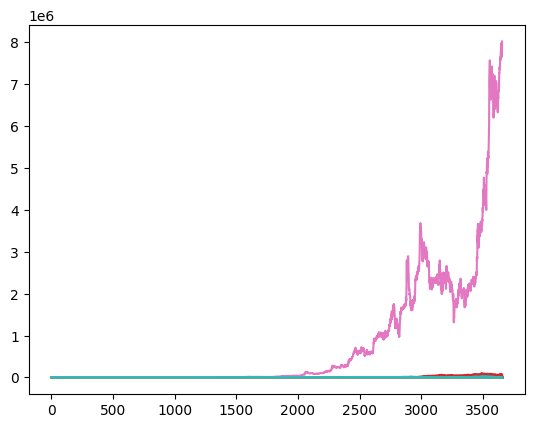

In [100]:
for i in range(num_iterations):
    plt.plot(bootstrapped_returns.iloc[:, i])

In [76]:
metrics_df = metrics_df_fnct(bootstrapped_returns, num_iterations)

In [77]:
mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)

In [78]:
overall_score

-0.28922163999640293

In [79]:
mdd

-0.7261827405596484

In [80]:
def confidence_interval_fnct(metric, confidence_level):
    lower_bound = np.percentile(metric, (1-confidence_level)/2 * 100)
    upper_bound = np.percentile(metric, (1+confidence_level)/2 * 100)
    return lower_bound, upper_bound

confidence_interval_fnct(metrics_df['max_drawdown'].abs(), 0.95)

(0.525604333742836, 0.9256855119365519)

In [81]:
import numpy as np
import scipy.stats as st

def calculate_var(returns, confidence_level=0.95, method="historical"):
    """Calculates Value at Risk (VaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% VaR).
        method (str): Calculation method ("historical", "parametric").

    Returns:
        float: VaR value.
    """
    if method == "historical":
        # Historical Simulation
        var = np.quantile(returns, 1 - confidence_level)  #Quantile function is used for VaR
    elif method == "parametric":
        # Variance-Covariance Method (assuming normal distribution)
        mu = np.mean(returns)
        sigma = np.std(returns)
        var = st.norm.ppf(1 - confidence_level, mu, sigma)[0]
    else:
        raise ValueError("Invalid VaR method.")
    return var


var_historical = calculate_var(returns, method="historical")
var_parametric = calculate_var(returns, method="parametric")
var_historical, var_parametric

C:\Users\yassi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(-0.0525701153045228, -0.057709103430116544)

In [82]:
def calculate_cvar(returns, confidence_level=0.95):
    """Calculates Conditional Value at Risk (CVaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% CVaR).

    Returns:
        float: CVaR value.
    """
    var = np.quantile(returns, 1 - confidence_level)
    cvar = np.mean(returns[returns <= var])
    return cvar

# Example usage (using the same random returns):
cvar = calculate_cvar(returns)
print(f"CVaR (95%): {cvar:.4f}")

CVaR (95%): -0.0822


Putting all together in functions

In [83]:
class Returns_Metrics():
    def __init__(self, prices):
       self.prices = prices
    
    # 2. Define the Performance Metric Functions
    def max_drawdown_fnct(self):
        """Calculate the maximum drawdown (peak to trough)."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        return drawdowns.min()

    def average_drawdown(self):
        """Calculate the average drawdown (peak to trough)."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        return drawdowns.mean()

    def average_drawdown_duration(self):
        """Calculate the average duration of drawdowns."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        drawdown_durations = []
        drawdown_start = None
        for i in range(1, len(drawdowns)):
            if drawdowns[i] < 0:
                if drawdown_start is None:
                    drawdown_start = i
            else:
                if drawdown_start is not None:
                    drawdown_durations.append(i - drawdown_start)
                    drawdown_start = None
        return np.mean(drawdown_durations) if drawdown_durations else 0

    def sharpe_ratio_fnct(self, risk_free_rate=0):
        """Calculate the Sharpe ratio."""
        returns = self.prices.pct_change().dropna()
        excess_returns = returns - risk_free_rate
        return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0
    
    def var(self, confidence_level):
        simple_returns = np.diff(self.prices) / self.prices[:-1]
        log_returns = np.log(simple_returns + 1)
        return np.quantile(log_returns   , 1 - confidence_level)
    
    def cvar(self, confidence_level):
        simple_returns = np.diff(self.prices) / self.prices[:-1]
        log_returns = np.log(simple_returns + 1)
        var = np.quantile(self.prices, 1 - confidence_level)
        return np.mean(log_returns[log_returns <= var])
    
    def confidence_interval_fnct(self, metric_series, confidence_level):
        lower_bound = np.percentile(metric_series, (1-confidence_level)/2 * 100)
        upper_bound = np.percentile(metric_series, (1+confidence_level)/2 * 100)
        return lower_bound, upper_bound

In [115]:
class Stress_Test():
    def __init__(self, returns, num_simulations, confidence_level):
        self.returns = returns
        self.num_simulations = num_simulations
        self.confidence_level = confidence_level
        
    def normal_sims(self):
        mu, sigma = self.returns.mean(), self.returns.std()
        normal_prices_df = pd.DataFrame()
        for i in range(self.num_simulations):
            sim_rets = np.random.normal(mu, sigma, 252)
            sim_prices = np.exp(sim_rets.cumsum())
            normal_prices_df[i] = sim_prices
            plt.axhline(initial_price, c = 'k')
            plt.plot(sim_prices)
        return normal_prices_df
    
    def t_sims(self):
        df, loc, scale = stats.t.fit(self.returns)
        simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(self.num_simulations, len(self.returns)))
        simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
        simulated_prices_df = pd.DataFrame(simulated_cumulative_returns).transpose()
        for i in range(self.num_simulations):
            plt.plot(simulated_cumulative_returns[i])
        return simulated_prices_df
    
    def block_bootstrap(self, block_size):
        resampled_series = []
        for _ in range(self.num_simulations):
            blocks = [self.returns[i:i + block_size] for i in range(len(self.returns) - block_size + 1)]
            sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(self.returns) // block_size + 1)]
            resampled = np.concatenate(sampled_blocks)[:len(self.returns)]
            resampled_cum = np.exp(resampled.cumsum())
            resampled_series.append(resampled_cum)
            resampled_df = pd.DataFrame(resampled_series).transpose()
        for i in range(self.num_simulations):
            plt.plot(resampled_df[i])
        return resampled_df
    
    def metrics_df_fnct(self, sims_df):
        metrics_dict = {
            'max_drawdown': [],
            'avg_drawdown': [],
            'avg_drawdown_duration': [],
            'sharpe_ratio': [],
            'var': [],
            'cvar': []
        }
        

        # Calculate metrics for each simulation path
        for i in range(self.num_simulations):
            sim_prices = sims_df[i]  # Get the i-th column (price path)
            metrics = Returns_Metrics(sim_prices)
            metrics_dict['max_drawdown'].append(metrics.max_drawdown_fnct())
            metrics_dict['avg_drawdown'].append(metrics.average_drawdown())
            metrics_dict['avg_drawdown_duration'].append(metrics.average_drawdown_duration())
            metrics_dict['sharpe_ratio'].append(metrics.sharpe_ratio_fnct())
            metrics_dict['var'].append(metrics.var(self.confidence_level))
            metrics_dict['cvar'].append(metrics.cvar(self.confidence_level))
        
        # Convert metrics to a DataFrame for easy handling
        metrics_df = pd.DataFrame(metrics_dict)
        return metrics_df
    
    def score_strategy(self, metrics_df):
        mdd = metrics_df['max_drawdown'].mean()
        avg_dd = metrics_df['avg_drawdown'].mean()
        sharpe = metrics_df['sharpe_ratio'].mean()
        recovery = metrics_df['avg_drawdown_duration'].mean()
        var = metrics_df['var'].mean()
        cvar = metrics_df['cvar'].mean()
        
        
        weights = [1 / len(metrics_df.columns)] * len(metrics_df.columns)
        mdd_score = 100 - (abs(mdd) / 0.50) * 100
        avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
        avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
        sharpe_score = (sharpe) / 0.5 * 100
        var_score = 100 - abs(var) / 0.2 * 100
        cvar_score = 100 - abs(cvar) / 0.2 * 100
        
        total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score, var_score, cvar_score])
        return total_score    
        

In [110]:
stress_test = Stress_Test(returns, 100, 0.95)

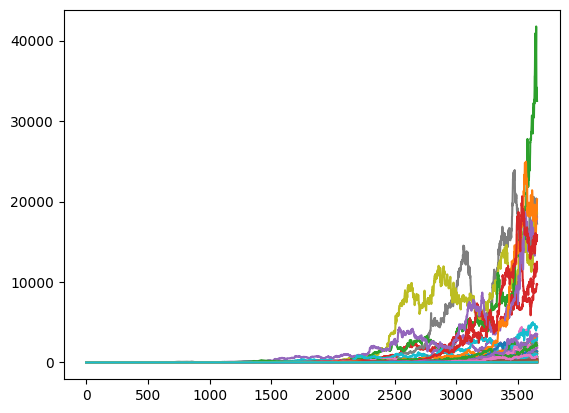

In [111]:
sims = stress_test.block_bootstrap(20)

In [112]:
sims

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.003112,0.947172,1.052887,0.984398,0.983560,0.997900,1.017955,1.004357,0.992394,1.024176,...,1.001346,0.976791,0.988442,0.952685,0.957086,0.999103,1.002832,0.994925,1.022218,1.027699
1,1.003023,0.960357,1.049653,1.011575,0.980872,1.005600,0.970985,1.000622,0.999961,1.050487,...,1.005462,0.955336,0.986903,0.920383,0.973618,0.959435,0.999960,0.980019,1.058552,1.031642
2,0.994220,0.887137,1.084757,1.033216,0.981006,0.999650,0.969828,1.034236,0.991015,1.048768,...,1.007886,0.949510,0.984319,0.958144,0.972740,0.957272,0.998724,0.986376,1.050696,1.066311
3,0.992575,0.979337,1.104619,1.077000,0.988577,0.982849,0.930828,1.048553,0.976197,1.076174,...,0.999923,0.944843,0.985742,0.944950,1.004734,0.985388,1.009653,1.041725,1.047054,1.081648
4,0.993775,0.949425,1.159122,1.106190,1.040810,0.969898,0.953758,1.052599,0.948808,1.073204,...,0.987690,0.905033,0.957690,0.904004,1.031689,0.980377,1.038732,0.992442,1.066039,1.096121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,15.074787,86.740861,29.843842,9553.744491,410.191074,626.980072,72.845139,19366.116410,648.063970,120.907186,...,94.911962,18941.620739,2180.088097,15722.286457,3280.050236,248.196705,721.436588,6.232156,111.191939,37.561811
3652,14.850823,86.845774,31.012000,9772.131230,401.842706,644.124122,72.767102,18814.586843,642.995445,123.094855,...,97.062258,18885.140072,2236.040823,15079.916311,3437.283065,254.484195,701.786266,6.218998,112.791310,37.578849
3653,14.277979,87.424717,29.864923,9766.757212,410.000250,700.205213,69.687013,19215.699663,627.754375,122.244596,...,97.452742,19075.898955,2213.936368,15474.316623,3478.047806,250.369802,736.116846,6.031801,114.300499,37.059240
3654,13.980790,86.620412,30.320034,9691.530843,423.500761,692.276678,66.325968,17335.494807,633.496345,123.386844,...,90.991332,19974.276793,2177.324453,15062.496171,3485.326313,247.486819,728.546596,5.710036,114.151963,36.804762


In [116]:
metrics_df = stress_test.metrics_df_fnct(sims)
score = stress_test.score_strategy(metrics_df)

In [117]:
metrics_df

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio,var,cvar
0,-0.769004,-0.298510,57.491803,0.038257,0.331831,0.292445
1,-0.779212,-0.271546,33.125000,0.053326,0.915150,0.845132
2,-0.679218,-0.286440,53.523810,0.043205,3.123528,2.420621
3,-0.518758,-0.143096,19.763975,0.088666,1.311667,1.133929
4,-0.719222,-0.223740,30.851852,0.064755,1.015326,0.843045
...,...,...,...,...,...,...
95,-0.784085,-0.245909,30.276786,0.060484,2.809787,2.120759
96,-0.601991,-0.218119,27.616667,0.065825,0.844443,0.758573
97,-0.742766,-0.319296,75.840909,0.031569,0.895956,0.776868
98,-0.923860,-0.401963,39.284091,0.053364,1.546924,1.258976


In [469]:
score

-109.35920399408803

In [121]:
sim_prices = sims[1]  # Get the i-th column (price path)
metrics = Returns_Metrics(sim_prices)
metrics.var(confidence_level)

0.9151497142479493